In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
x = df[['Survived', 'Age', 'Sex', 'Pclass', 'SibSp', 'Embarked']]
x['Sex'] = x['Sex'].map({'male':0, 'female':1})
x['Age'].fillna(np.mean(x['Age']), inplace=True)
x.dropna(axis=0, how='any', inplace=True)
embarked = pd.get_dummies(x['Embarked'])
x = pd.concat([x, embarked], axis=1).drop(columns=['Embarked'])
x

/home/usr/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/usr/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/usr/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Survived,Age,Sex,Pclass,SibSp,C,Q,S
0,0,22.000000,0,3,1,0,0,1
1,1,38.000000,1,1,1,1,0,0
2,1,26.000000,1,3,0,0,0,1
3,1,35.000000,1,1,1,0,0,1
4,0,35.000000,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,27.000000,0,2,0,0,0,1
887,1,19.000000,1,1,0,0,0,1
888,0,29.699118,1,3,1,0,0,1
889,1,26.000000,0,1,0,1,0,0


In [4]:
y = x['Survived'].values.reshape(-1, 1)
x = x.drop(columns=['Survived']).values

In [5]:
def create_model():
    inputs = Input(shape=(7))
    hidden = Dense(128, kernel_initializer='he_uniform')(inputs)
    hidden = LeakyReLU()(hidden)
    hidden = Dropout(0.2)(hidden)
    hidden = Dense(64, kernel_initializer='he_uniform')(hidden)
    hidden = LeakyReLU()(hidden)
    hidden = Dropout(0.2)(hidden)
    hidden = Dense(32, kernel_initializer='he_uniform')(hidden)
    hidden = BatchNormalization()(hidden)
    hidden = LeakyReLU()(hidden)
    outputs = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(hidden)
    return Model(inputs=inputs, outputs=outputs)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
scaler = preprocessing.StandardScaler()
x_train[:, 0] = scaler.fit_transform(x_train[:, 0].reshape(-1, 1)).reshape(-1)
x_test[:, 0] = scaler.transform(x_test[:, 0].reshape(-1, 1)).reshape(-1)

Epoch 1/100
23/23 - 0s - loss: 0.7765 - accuracy: 0.5485 - val_loss: 0.4613 - val_accuracy: 0.8258
Epoch 2/100
23/23 - 0s - loss: 0.5840 - accuracy: 0.7145 - val_loss: 0.4229 - val_accuracy: 0.8258
Epoch 3/100
23/23 - 0s - loss: 0.5402 - accuracy: 0.7567 - val_loss: 0.4268 - val_accuracy: 0.8315
Epoch 4/100
23/23 - 0s - loss: 0.5265 - accuracy: 0.7693 - val_loss: 0.4173 - val_accuracy: 0.8371
Epoch 5/100
23/23 - 0s - loss: 0.4859 - accuracy: 0.7820 - val_loss: 0.4137 - val_accuracy: 0.8371
Epoch 6/100
23/23 - 0s - loss: 0.4910 - accuracy: 0.7918 - val_loss: 0.4168 - val_accuracy: 0.8371
Epoch 7/100
23/23 - 0s - loss: 0.4957 - accuracy: 0.7693 - val_loss: 0.4136 - val_accuracy: 0.8315
Epoch 8/100
23/23 - 0s - loss: 0.4783 - accuracy: 0.8045 - val_loss: 0.4070 - val_accuracy: 0.8371
Epoch 9/100
23/23 - 0s - loss: 0.4716 - accuracy: 0.8017 - val_loss: 0.4010 - val_accuracy: 0.8539
Epoch 10/100
23/23 - 0s - loss: 0.4981 - accuracy: 0.7862 - val_loss: 0.3998 - val_accuracy: 0.8483
Epoch 11/

23/23 - 0s - loss: 0.4349 - accuracy: 0.8073 - val_loss: 0.3943 - val_accuracy: 0.8315
Epoch 84/100
23/23 - 0s - loss: 0.4275 - accuracy: 0.8158 - val_loss: 0.3908 - val_accuracy: 0.8315
Epoch 85/100
23/23 - 0s - loss: 0.4229 - accuracy: 0.8284 - val_loss: 0.3908 - val_accuracy: 0.8483
Epoch 86/100
23/23 - 0s - loss: 0.4459 - accuracy: 0.8101 - val_loss: 0.3901 - val_accuracy: 0.8483
Epoch 87/100
23/23 - 0s - loss: 0.4231 - accuracy: 0.8200 - val_loss: 0.3845 - val_accuracy: 0.8539
Epoch 88/100
23/23 - 0s - loss: 0.4335 - accuracy: 0.8143 - val_loss: 0.3899 - val_accuracy: 0.8539
Epoch 89/100
23/23 - 0s - loss: 0.4258 - accuracy: 0.8312 - val_loss: 0.3851 - val_accuracy: 0.8539
Epoch 90/100
23/23 - 0s - loss: 0.4429 - accuracy: 0.8073 - val_loss: 0.3868 - val_accuracy: 0.8539
Epoch 91/100
23/23 - 0s - loss: 0.4260 - accuracy: 0.8340 - val_loss: 0.3902 - val_accuracy: 0.8596
Epoch 92/100
23/23 - 0s - loss: 0.4337 - accuracy: 0.8284 - val_loss: 0.3813 - val_accuracy: 0.8652
Epoch 93/100


Epoch 66/100
23/23 - 0s - loss: 0.4227 - accuracy: 0.8312 - val_loss: 0.3815 - val_accuracy: 0.8596
Epoch 67/100
23/23 - 0s - loss: 0.4363 - accuracy: 0.8129 - val_loss: 0.3816 - val_accuracy: 0.8652
Epoch 68/100
23/23 - 0s - loss: 0.4438 - accuracy: 0.8031 - val_loss: 0.3817 - val_accuracy: 0.8596
Epoch 69/100
23/23 - 0s - loss: 0.4275 - accuracy: 0.8143 - val_loss: 0.3814 - val_accuracy: 0.8596
Epoch 70/100
23/23 - 0s - loss: 0.4280 - accuracy: 0.8158 - val_loss: 0.3819 - val_accuracy: 0.8652
Epoch 71/100
23/23 - 0s - loss: 0.4286 - accuracy: 0.8228 - val_loss: 0.3820 - val_accuracy: 0.8652
Epoch 72/100
23/23 - 0s - loss: 0.4349 - accuracy: 0.8158 - val_loss: 0.3824 - val_accuracy: 0.8596
Epoch 73/100
23/23 - 0s - loss: 0.4321 - accuracy: 0.8172 - val_loss: 0.3823 - val_accuracy: 0.8596
Epoch 74/100
23/23 - 0s - loss: 0.4235 - accuracy: 0.8256 - val_loss: 0.3823 - val_accuracy: 0.8596
Epoch 75/100
23/23 - 0s - loss: 0.4249 - accuracy: 0.8200 - val_loss: 0.3822 - val_accuracy: 0.8596


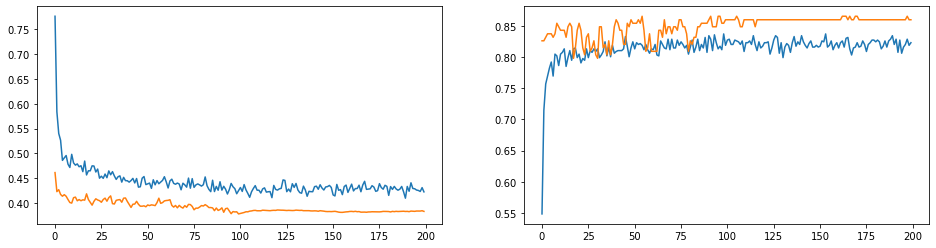

In [7]:
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
filepath = 'checkpoint.h5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, mode='min')
history0 = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[checkpoint],
                    shuffle=True,
                    verbose=2)
model = load_model(filepath)
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9),metrics=['accuracy'])
history1 = model.fit(x_train, y_train,
                     validation_data=(x_test, y_test),
                     epochs=100,
                     callbacks=[checkpoint],
                     shuffle=True,
                     verbose=2)
model=load_model(filepath)
model.evaluate(x_test, y_test, verbose=2)
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(history0.history['loss'] + history1.history['loss'])
plt.plot(history0.history['val_loss'] + history1.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history0.history['accuracy'] + history1.history['accuracy'])
plt.plot(history0.history['val_accuracy'] + history1.history['val_accuracy'])
plt.show()

In [8]:
sub = pd.read_csv('test.csv')
sub = sub[['Age', 'Sex', 'Pclass', 'SibSp', 'Embarked']]
sub['Sex'] = sub['Sex'].map({'male':0, 'female':1})
sub['Age'].fillna(np.mean(sub['Age']), inplace=True)
embarked = pd.get_dummies(sub['Embarked'])
sub = pd.concat([sub, embarked], axis=1).drop(columns=['Embarked']).values

In [9]:
sub[:, 0] = scaler.transform(sub[:, 0].reshape(-1, 1)).reshape(-1)
pred = model.predict(sub).reshape(-1)
ans = [round(i) for i in pred]

In [10]:
df = pd.read_csv('gender_submission.csv')

In [11]:
df['Survived'] = ans

In [12]:
df.to_csv('submission.csv', index=False, header=True)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
